![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

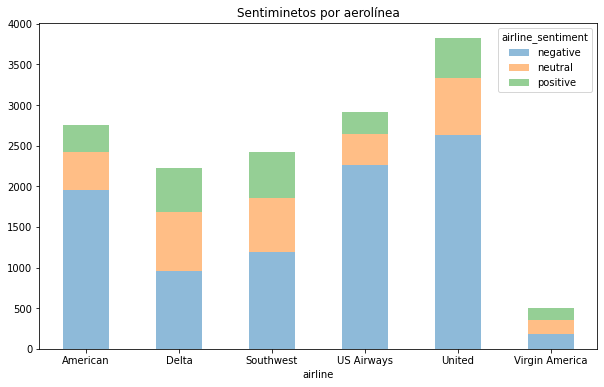

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

In [8]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"])

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


### Liberias y Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Luego, dividimos el entrenamiento para crear un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Ajusta el test_size según lo que necesites

# Vectorización de los datos
vect = CountVectorizer()
X_train_cv = vect.fit_transform(X_train)
X_val_cv = vect.transform(X_val)  # Transformar el conjunto de validación
X_test_cv = vect.transform(X_test)  # Asegurarse de transformar el conjunto de prueba con el mismo vectorizador


In [13]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect = CountVectorizer()

In [14]:
# Tokenización del conjunto de entrenamiento
X_train_cv = vect.fit_transform(X_train)
X_train_cv.shape

(7846, 10575)

In [15]:
# Aplicar tokenización al conjunto de prueba
X_test_cv = vect.transform(X_test)
X_test_cv.shape

(4832, 10575)

In [16]:
# Creación del modelo de regresión
clf_rf = RandomForestClassifier(n_estimators=90)

# Entrenar el modelo con el conjunto de entrenamiento
clf_rf.fit(X_train_cv, y_train)

# Predicir en el conjunto de test
y_pred_rf = clf_rf.predict(X_test_cv)

In [17]:
accuracy_cv = accuracy_score(y_pred_rf, y_test)
print('Accuracy: ',accuracy_cv)

Accuracy:  0.7642798013245033


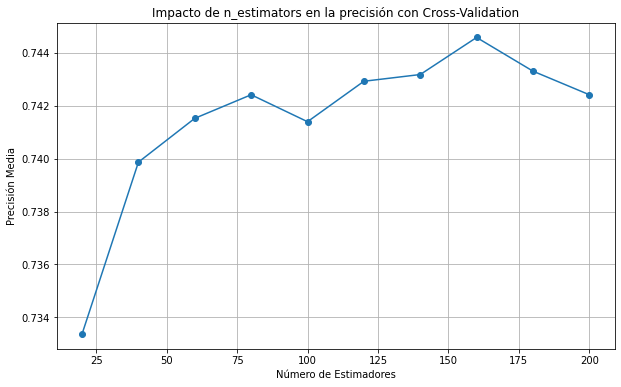

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

estimator_range =  range(20, 210, 20)
cross_val_scores = []

for estimator in estimator_range:
    clf_rf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf_rf, X_train_cv, y_train, cv=3, scoring='accuracy')
    cross_val_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, cross_val_scores, marker='o')
plt.title('Impacto de n_estimators en la precisión con Cross-Validation')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión Media')
plt.grid(True)
plt.show()

 Nuestra evaluación mediante validación cruzada para ajustar el hiperparámetro n_estimators del modelo RandomForestClassifier ha demostrado que no mejora significativamente la precisión, la cual se mantuvo por debajo de 0.75 en la validación cruzada, comparado con una precisión de 0.77 alcanzada directamente en el conjunto de prueba con el n_estimators por defecto (n_estimators=100). Esto sugiere que la configuración predeterminada es ya bastante efectiva y que el uso de validación cruzada en este contexto no ofrece un beneficio claro. Por tanto, dejaremos el valor por defecto de n_estimators, simplificando el proceso y maximizando la eficiencia computacional sin sacrificar la precisión del modelo.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 2
# Creación de matrices de documentos usando CountVectorizer a partir de X eliminando Stopwords
vect_no_stopw = CountVectorizer(stop_words='english')

In [20]:
# Tokenización del conjunto de entrenamiento
X_train_ns = vect_no_stopw.fit_transform(X_train)
X_train_ns.shape

(7846, 10297)

In [21]:
# Aplicar tokenización al conjunto de prueba
X_test_ns = vect_no_stopw.transform(X_test)
X_test_ns.shape

(4832, 10297)

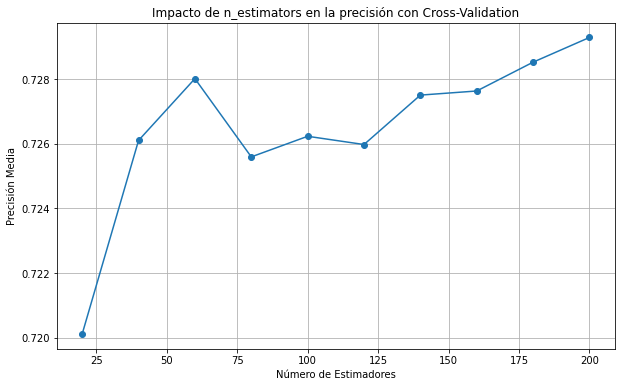

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

accuracy_scores_ns = range(20, 210, 20)
cross_val_scores_ns = []

for estimator in accuracy_scores_ns:
    clf_rf_ns = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf_rf_ns, X_train_ns, y_train, cv=3, scoring='accuracy')
    cross_val_scores_ns.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores_ns, cross_val_scores_ns, marker='o')
plt.title('Impacto de n_estimators en la precisión con Cross-Validation')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión Media')
plt.grid(True)
plt.show()

In [23]:
# Creación del modelo de regresión
clf_rf_ns = RandomForestClassifier(n_estimators=160)

# Entrenar el modelo con el conjunto de entrenamiento
clf_rf_ns.fit(X_train_ns, y_train)

# Predicir en el conjunto de test
y_pred_rf_ns = clf_rf_ns.predict(X_test_ns)

In [24]:
accuracy_ns = accuracy_score(y_pred_rf_ns, y_test)
print('Accuracy: ',accuracy_ns)

Accuracy:  0.7588990066225165


### Punto 3 - Lematización con verbos
En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento (.fit_transform()) deben ser aplicado al set de test (.transform()).

In [25]:
# Celda 3
# Definición de la función que tenga como parámetro texto (asumiendo que cada palabra es un verbo) y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

In [26]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)

In [27]:
# Tokenización del conjunto de entrenamiento
X_train_vl = vect_lemas.fit_transform(X_train)
X_train_vl.shape

(7846, 16699)

In [28]:
# Aplicar tokenización al conjunto de prueba
X_test_vl = vect_lemas.transform(X_test)
X_test_vl.shape

(4832, 16699)

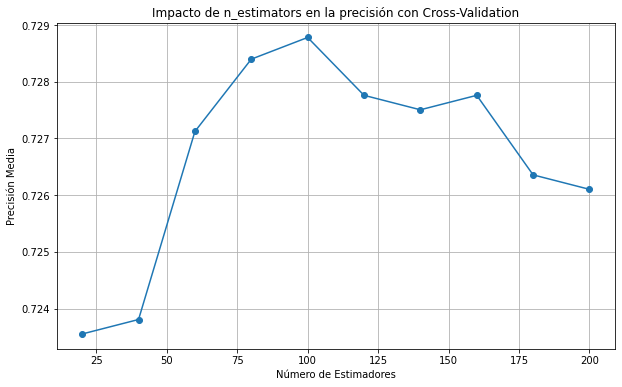

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

accuracy_scores_vl = range(20, 210, 20)
cross_val_scores_vl = []

for estimator in accuracy_scores_vl:
    clf_rf_vl = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf_rf_vl, X_train_vl, y_train, cv=3, scoring='accuracy')
    cross_val_scores_vl.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores_vl, cross_val_scores_vl, marker='o')
plt.title('Impacto de n_estimators en la precisión con Cross-Validation')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión Media')
plt.grid(True)
plt.show()

In [30]:
# Creación del modelo de regresión
clf_rf_vl = RandomForestClassifier(n_estimators=40)

# Entrenar el modelo con el conjunto de entrenamiento
clf_rf_vl.fit(X_train_vl, y_train)

# Predicir en el conjunto de test
y_pred_rf_vl = clf_rf_vl.predict(X_test_vl)

In [31]:
accuracy_vl = accuracy_score(y_pred_rf_vl, y_test)
print('Accuracy: ',accuracy_vl)

Accuracy:  0.7528973509933775


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [32]:
# Celda 4
vec_mix = CountVectorizer(stop_words='english',analyzer=split_into_lemmas)

In [33]:
# Tokenización del conjunto de entrenamiento
X_train_mix = vect_lemas.fit_transform(X_train)
X_train_mix.shape

(7846, 16699)

In [34]:
# Aplicar tokenización al conjunto de prueba
X_test_mix = vect_lemas.transform(X_test)
X_test_mix.shape

(4832, 16699)

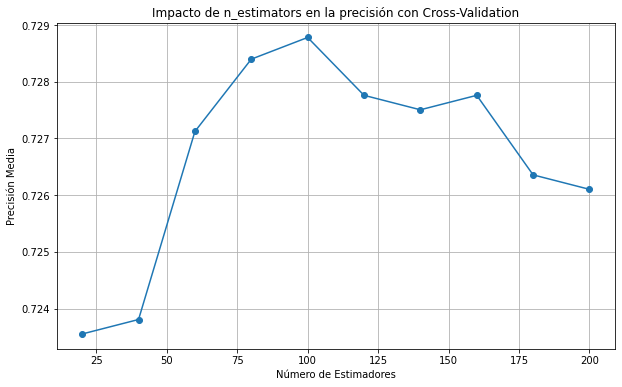

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

accuracy_scores_mix = range(20, 210, 20)
cross_val_scores_mix = []

for estimator in accuracy_scores_vl:
    clf_rf_mix = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf_rf_mix, X_train_mix, y_train, cv=3, scoring='accuracy')
    cross_val_scores_mix.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores_mix, cross_val_scores_mix, marker='o')
plt.title('Impacto de n_estimators en la precisión con Cross-Validation')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión Media')
plt.grid(True)
plt.show()

In [36]:
# Creación del modelo de regresión
clf_rf_mix = RandomForestClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
clf_rf_mix.fit(X_train_mix, y_train)

# Predicir en el conjunto de test
y_pred_rf_mix = clf_rf_mix.predict(X_test_mix)

In [37]:
accuracy_mix = accuracy_score(y_pred_rf_mix, y_test)
print('Accuracy: ',accuracy_mix)

Accuracy:  0.7570364238410596


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

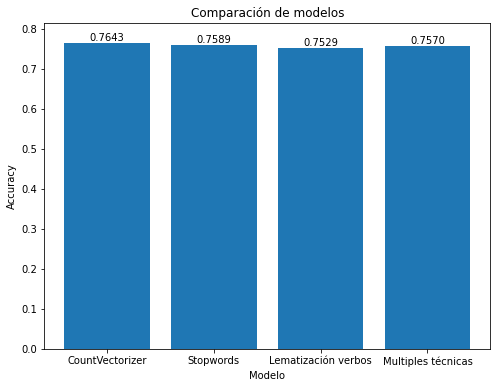

In [38]:
# Celda 5

model_names = ['CountVectorizer', 'Stopwords', 'Lematización verbos', 'Multiples técnicas']
rmse_values = [accuracy_cv, accuracy_ns, accuracy_vl, accuracy_mix]


plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de modelos')
for i in range(len(model_names)):
    plt.text(i, rmse_values[i], f'{rmse_values[i]:.4f}', ha = 'center', va = 'bottom')
plt.ylim(0, max(rmse_values) + 0.05)  
plt.show()


En el análisis de sentimientos de tweets utilizando varios modelos de RandomForestClassifier con diferentes técnicas de preprocesamiento de texto, observamos resultados que varían ligeramente en términos de precisión.

- **Uso de CountVectorizer (Punto 1):** Este modelo proporcionó una base sólida con una precisión de 0.7643, demostrando ser efectivo sin ajustes adicionales. Representa un buen punto de partida y muestra que la frecuencia básica de las palabras puede ser suficiente para un análisis de sentimiento competente.
- **Eliminación de Stopwords (Punto 2):** La precisión de este modelo fue ligeramente inferior, de 0.7589. Esto sugiere que, aunque la eliminación de stopwords es una técnica común para reducir el ruido en el procesamiento de texto, en este caso particular, podría haber eliminado también información contextual que es útil para la predicción de sentimientos.
- **Lematización con verbos (Punto 3):** Este enfoque alcanzó una precisión de 0.7529, la más baja entre los modelos. Esto indica que la lematización de verbos por sí sola no aporta significativamente a la mejora del modelo y, en este contexto, no parece ser una técnica efectiva para el análisis de sentimientos de tweets.
- **Múltiples técnicas (Punto 4):** Combinando CountVectorizer, eliminación de stopwords, y lematización de verbos, este modelo alcanzó una precisión de 0.7570. Aunque combinó varias técnicas, la mejora en la precisión no fue significativa en comparación con el uso solo de CountVectorizer, sugiriendo que la complejidad añadida no se traduce necesariamente en un mejor rendimiento.

En cuanto a la búsqueda de un n_estimators óptimo mediante validación cruzada, se observó que no proporcionó una ventaja significativa en ninguno de los casos, indicando que el valor por defecto de 100 es adecuado y eficiente para estos modelos. Esto resalta una limitación de la validación cruzada en este contexto específico, donde las mejoras incrementales a través de la ajustación de hiperparámetros no se traducen en beneficios claros.

### Conclusión: 
La comparación de estos modelos sugiere que, para este conjunto de datos y tarea específica, la configuración más simple utilizando únicamente **CountVectorizer** proporciona un rendimiento comparable o incluso superior a las técnicas más complejas.






